# AdaBoost or Adaptive Boosting

## Introduction

### Boosting in Trees

There are two types of boosting used in trees in common practice today: 
- The first type of boosting is the use of one model to precondition the inputs of another model. This is the most common jargon usage of this word in data science. If you hear fellow data scientists say "boosting", they are often referring to boosted trees. 

### Adding bias into the training process

- In the boosted tree algorithms, a ensemble of trees is "grown" over successive generations of trees, by making each successor tree an expert on attacking the weaknesses of the other. 
- What results is a forest of trees designed to defeat all weaknesses of the training set. 
- Members of the ensemble are weighted by the ratio of errors not covered by the previous members.

### About Adaboost

- AdaBoost focuses on providing each tree a description of the mistakes of the last tree (through the "loss" function). 
- Each tree is given the opportunity to **Ada**pt itself to the weaknesses of previous trees. 
- Finally the end classifier is something like a random forest, where each of the trees votes, weighted inversely to its own total error.

### Adaboost should meet two conditions:

- The classifier should be trained interactively on various **weighted training examples**.
- In each iteration, it tries to provide an excellent fit for these examples by minimizing training error.

## How does the AdaBoost algorithm work?

It works in the following steps:

- Initially, Adaboost selects a training subset randomly.
- It iteratively trains the AdaBoost machine learning model by selecting the training set based on the accurate prediction of the last training.
- It assigns the higher weight to wrong classified observations so that in the next iteration these observations will get the high probability for classification.
- Also, It assigns the weight to the trained classifier in each iteration according to the accuracy of the classifier. The more accurate classifier will get high weight.

<center><img src="images/adaboost.png" width="500"/></center>

![adaboost_scheme](./images/AdaBoost_scheme.png)

Below is shown a plot of the AdaBoost partition:

![adaboost_part](./images/AdaBoost_part.png)

Successive trees end up covering the limitations of previous trees. The size of the points reflect their weighting at that point. The misclassified points are *individually* penalized, just as misclassified points are penalized in SVMs. 

The next tree in the family may or may not correctly classify these points (it is still just a simple decision tree), but if it does, then the total cost function comes down, and it is more favorable to keep the tree. If it does not, the weights continue to increase until a tree comes along that correctly classifies these points. 

### Toy Example:

<center><img src="images/ab1.png" width="200"/></center>

<center><img src="images/ab2.png" width="600"/></center>

<center><img src="images/ab3.png" width="600"/></center>

## The AdaBoost Algorithm

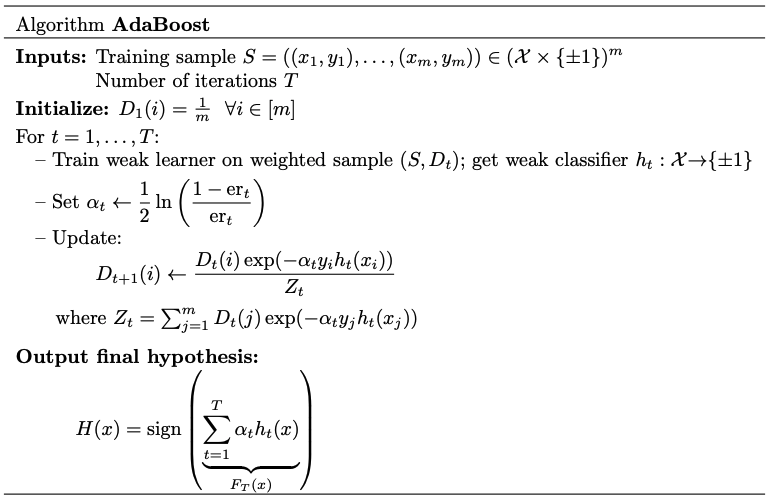

    Fit:
    
        Initialize weights W to be 1/N
        for m in range(1,M): (M determined by user)
            fit a standard decision tree G(X,w)
            compute total error err <- sum(W*misclassified points)/sum(W)
            compute alpha_i <- log((1-err)/err)
            change weights by an exponent if misclassified w_i <- 
            w_i * exp(alpha_i)
   
    Predict:
     
        for m in range(1, M):
            sum += alpha_m * G_m(X)
        return sign(sum)

### Exponential Loss

This is the loss function that we use in discrete adaboost:

$$l(y_i, f(\theta, x_i)) = ln(1+e^{-y_i \cdot f(\theta,x_i)})$$

### Hyperparameters

- **base_estimator**: It is a weak learner used to train the model. It uses DecisionTreeClassifier as default weak learner for training purpose. You can also specify different machine learning algorithms.

- **n_estimators**: Number of weak learners to train iteratively.

- **learning_rate**: It contributes to the weights of weak learners. It uses 1 as a default value.

### How the Weights are Used

The weights $w_{i}$ are used in the impurity estimator during the split, making it progressively more unfavorable when we calculate the information gain if they are misclassified (fall inside a leaf belonging to another class - the weights increase the equivalent counts of a class belonging to that point). This results in a powerful increase in impurity if this point is misclassified.


### Some Details:

Thus the most specific trees (at the end of the boost chain) are often the most dilute (reflect the fewest points), but they are weighted (by error score) much more than the earliest. Many of the later trees may specify for only a tiny number of points. The mixture of different trees can manage outliers and noise much better than otherwise.

Adaboost is often affected profoundly by the choice of prepruning parameters. This can be thought of in terms of the tree's selection of partition boundary. If the boundaries for an individual tree become complex, we are eschewing the algorithm's ability to weight the votes of later trees to manage small numbers of specific points in favor of overfitting.

# Demo

In [4]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets

# Import train_test_split function
from sklearn.model_selection import train_test_split

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

import numpy as np

In [5]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [6]:
X.shape, y.shape, np.unique(y, return_counts=True)

((150, 4), (150,), (array([0, 1, 2]), array([50, 50, 50])))

In [7]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3) # 70% training and 30% test

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((105, 4), (105,), (45, 4), (45,))

In [9]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)


# Train Adaboost Classifer
model = abc.fit(X_train, y_train)


#Predict the response for test dataset
y_pred = model.predict(X_test)

In [10]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [11]:
# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation

svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, base_estimator=svc, 
                         learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


## References
http://www.inf.fu-berlin.de/inst/ag-ki/adaboost4.pdf - short paper with clean derivation  
https://en.wikipedia.org/wiki/AdaBoost  
http://math.mit.edu/~rothvoss/18.304.3PM/Presentations/1-Eric-Boosting304FinalRpdf.pdf - Includes description of importance sampling
http://statweb.stanford.edu/~jhf/ftp/boost.pdf - Friedman's analysis of adaboost  